# Analiza podatkov iz hribi.net

Za projektno bom analiziral podatke iz [Hribi.net](https://www.hribi.net/). Podatke sem zbral za vse države, ki so bile na voljo in za katere so bili na voljo podatki. To vključuje Slovenijo, med drugimi pa tudi Avstrijo, Italijo, Hrvaško, Grčijo in druge. Analiziral bom:

- slovenske gore,
- gore po svetu,
- poti,
- vplive na priljubljenost gor.

In [1]:
import pandas as pd

pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 25)

gore = pd.read_csv("gore.csv", index_col="id")

## Slovenske gore

Za začetek si oglejmo 15 najvišjih slovenskih vrhov.

In [2]:
slovenske_gore = gore[gore["država"].str.contains("Slovenija") & gore["vrsta"].str.contains("vrh")].copy().sort_values("višina", ascending=False)
slovenske_gore[["ime", "višina"]].head(15)

,ime,višina
id,,
101,Triglav,2864
102,Škrlatica,2740
103,Mali Triglav,2725
104,Mangart,2679
105,Visoki Rokav,2646
106,Jalovec,2645
107,Veliki Oltar,2621
108,Velika Martuljška Ponca,2602
109,Razor,2601


Seveda je Triglav najvišji, opazimo pa lahko, da vsi vrhovi segajo krepko čez 2000 metrov nadmorske višine. Zanima nas, kolikšen delež vrhov je višji od 2000 m.

<Axes: title={'center': 'Delež dvatisočakov izmed vseh slovenskih gora'}>

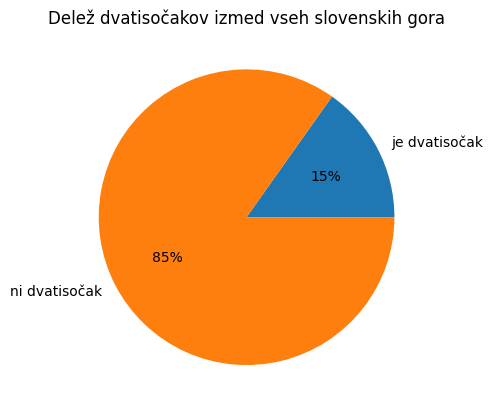

In [3]:
slovenske_gore["dvatisočak"] = slovenske_gore["višina"].apply(lambda x: "je dvatisočak" if x >= 2000 else "ni dvatisočak")

slovenske_gore.groupby("dvatisočak").size().plot.pie(title="Delež dvatisočakov izmed vseh slovenskih gora", autopct='%1.0f%%')

Torej le 15 % vrhov lahko uvrstimo med dvatisočake, kar je razmeroma malo. Kakšne višine pa prevladujejo v slovenskih gorah?

### Porazdelitev slovenskih gora po višini

Oglejmo si sedaj, koliko vrhov posameznih višin imamo. Za lažji prikaz bomo višino zaokrožili na stotice. 

<Axes: title={'center': 'Število vrhov v odvisnosti od višine'}, xlabel='zaokrožena višina v metrih', ylabel='število vrhov'>

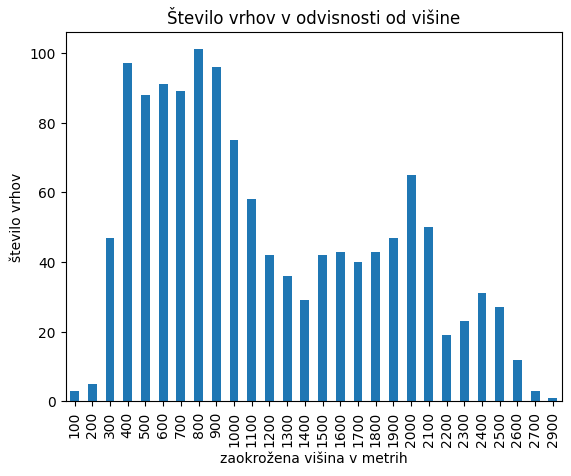

In [4]:
gore["zaokrožena višina"] = gore["višina"].round(-2)
slovenske_gore["zaokrožena višina"] = slovenske_gore["višina"].round(-2)

po_visini = slovenske_gore.groupby("zaokrožena višina").size()
po_visini.plot.bar(title="Število vrhov v odvisnosti od višine",xlabel="zaokrožena višina v metrih", ylabel="število vrhov")

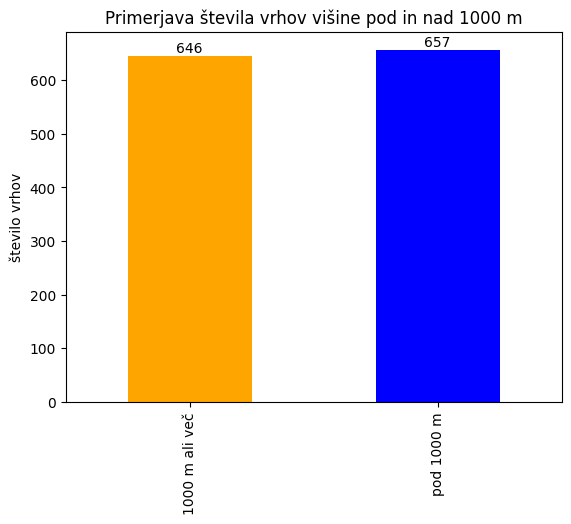

In [5]:
slovenske_gore["pod/nad 1000"] = slovenske_gore["višina"].apply(lambda x: "pod 1000 m" if x < 1000 else  "1000 m ali več")

graf_1000 = slovenske_gore.groupby("pod/nad 1000").size().plot.bar(title="Primerjava števila vrhov višine pod in nad 1000 m", 
                                                                   ylabel="število vrhov", xlabel="", 
                                                                   color=["orange", "blue"])
for container in graf_1000.containers:
    graf_1000.bar_label(container)

Največ je vrhov višine 800 m, veliko je tudi vrhov med 400 m in 900 m. Zanimivo je, da število vrhov po višini nekaj časa narašča, nato pade pri višini okoli 1000 m, nato zopet naraste pri 1500 m in pade pri 2200 m. Po tej višini se zopet malo dvigne. Imamo več vrhov, nižjih od 1000 m kot višjih, a le za 9 (657 in 646).

### Ločitev na gorovja

Ali so katera gorovja v povprečju višja od drugih? Poglejmo si povprečno višino gora v vsakem gorovju.

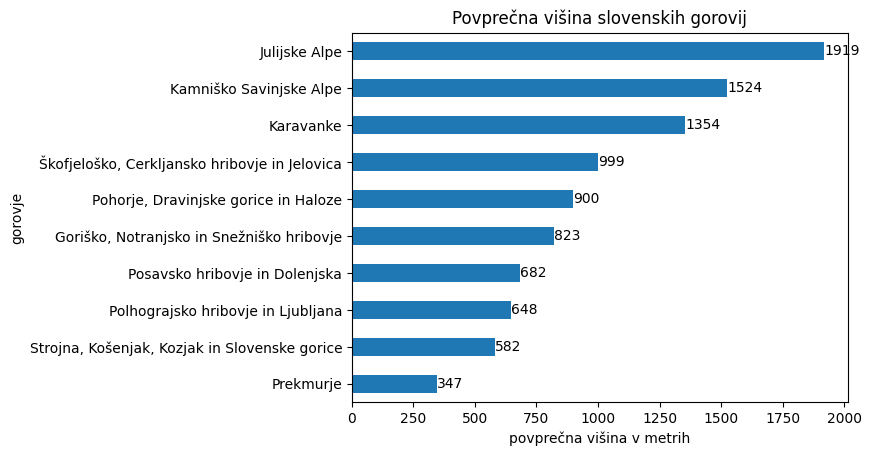

In [6]:
po_gorovju = slovenske_gore.groupby("gorovje")["zaokrožena višina"].mean()
graf_po_gorovju = po_gorovju.sort_values().plot.barh(title="Povprečna višina slovenskih gorovij",
                                                     xlabel="povprečna višina v metrih",
                                                     ylabel="gorovje")
for container in graf_po_gorovju.containers:
    graf_po_gorovju.bar_label(container, fmt='%.0f')

Kot pričakovano, so Julijske Alpe na prvem mestu. Presenetljivo pa je, da je razlika med povprečno višino gore iz Julijskih Alp in gore iz Kamniško Savinjskih Alp večja, kakor je razlika med povprečno višino gore iz Karavank ter hriba iz Škofjeloškega, Cerkljanskega hribovja in Jelovice. Imamo torej večje razlike v višinah med gorami, kakor med gorami in hribi.

Primerjajmo porazdelitev višine vrhov glede po gorovjih, v tem primeru Julijskih Alp, Karavank in Kamniško Savinjskih Alp. Ostala gorovja so zaradi nepreglednosti grafa izpuščena.

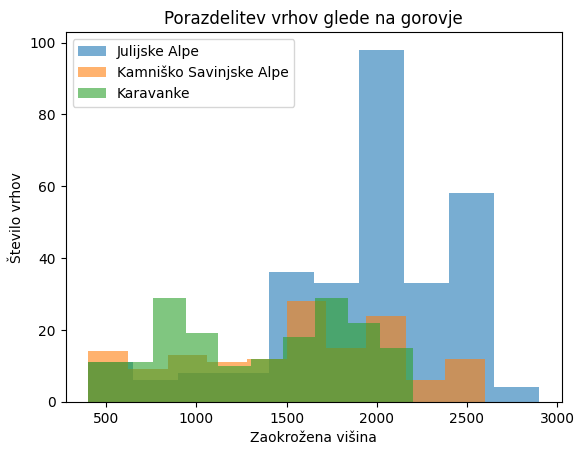

In [7]:
pogoj_za_ja_k_ksa = ((slovenske_gore["gorovje"] == "Julijske Alpe") | (slovenske_gore["gorovje"] == "Karavanke") | 
                     (slovenske_gore["gorovje"] == "Kamniško Savinjske Alpe"))
julijske_karavanke_kamnisko_savinjske_alpe = slovenske_gore[pogoj_za_ja_k_ksa]

graf_primerjava = julijske_karavanke_kamnisko_savinjske_alpe.groupby("gorovje")["zaokrožena višina"].plot.hist(
    title="Porazdelitev vrhov glede na gorovje", xlabel="Zaokrožena višina", ylabel="Število vrhov",
    legend=True, alpha=0.6)

Vidimo, da poleg dejstva, da je povprečni vrh iz Julijskih Alp najvišji (kar smo ugotovili že pri prejšnjem grafu), so tudi gore v Julijskih Alpah na sploh občutno višje od gora v Kamniško Savinjskih Alpah in Karavankah. To lahko razberemo iz tega, da so Julijske Alpe pomaknjene bolj desno, kar pomeni višje vrhove. Zdi se tudi, da se največ vrhov izmed teh treh gorovij nahaja prav v Julijskih Alpah, kar si bomo ogledali v naslednjem grafu.

### Kakšna je razporeditev vrhov po gorovjih?

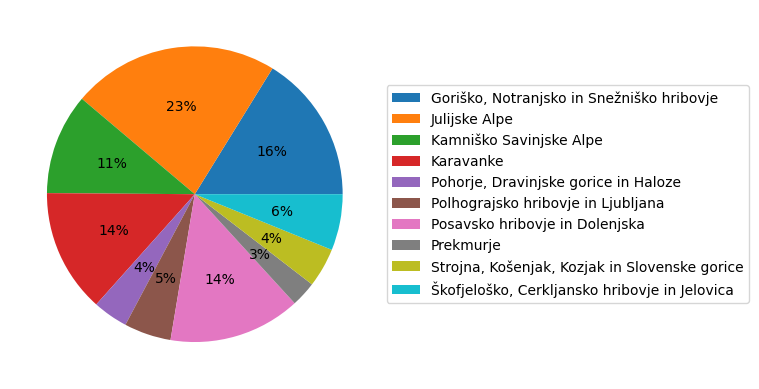

In [8]:
po_gorovju_st_vrhov = slovenske_gore.groupby("gorovje").size()
graf_po_gorovju_st_vrhov = po_gorovju_st_vrhov.plot.pie(legend=True, autopct='%1.0f%%', labels=None)
graf_po_gorovju_st_vrhov.legend(po_gorovju_st_vrhov.index, loc="center left", bbox_to_anchor=(1.0, 0.5))


Največ vrhov se nahaja v Julijskih Alpah, na drugem mestu pa je presenetljivo Goriško, Notranjsko in Snežiško hribovje. Osebno sem pričakoval, da bodo Karavanke ali pa Kamniško Savnijske Alpe na drugem mestu. Kot pa bi lahko pričakovali, je v Prekmurju najmanj vrhov zaradi Panonske nižine.

## Svetovne gore

Najprej spoznajmo, za katere države imamo podatke.

<Axes: title={'center': 'Število gor po državah'}, xlabel='država', ylabel='število gor'>

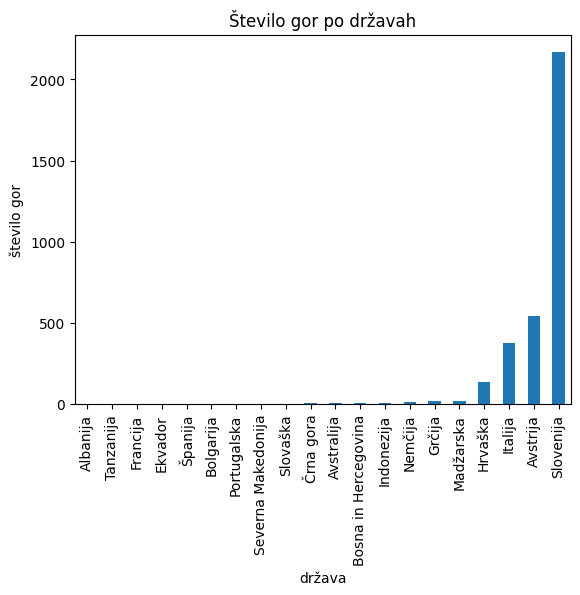

In [9]:
gore_razbito = gore.copy()
gore_razbito['država'] = gore['država'].str.split(', ')     # popravimo, ker nekatere gore vsebujejo več držav
gore_razbito = gore_razbito.explode('država')

po_drzavi_st_vrhov = gore_razbito.groupby("država").size()
po_drzavi_st_vrhov.sort_values().plot.bar(xlabel="država", ylabel="število gor", title="Število gor po državah")

Podatki so očitno osredotočeni na ozemlje okoli Slovenije, saj izpuščajo veliko gorovij v ostalih državah.

Kot smo si že ogledali število vrhov v odvisnosti od višine, si oglejmo zdaj še enak graf za vse gore in ne le za slovenske.

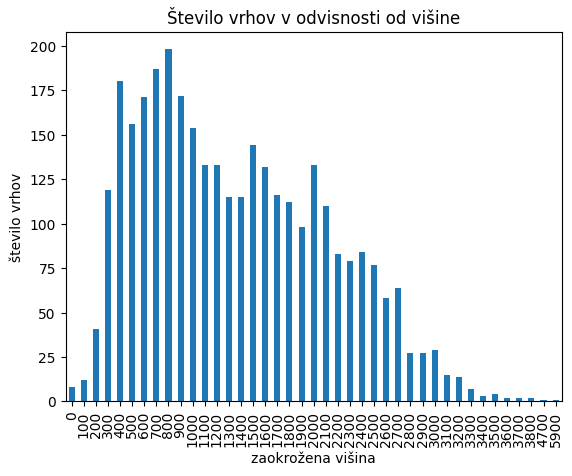

In [10]:
po_visini_vse = gore.groupby("zaokrožena višina").size()
graf_po_visini_vse = po_visini_vse.plot.bar(title="Število vrhov v odvisnosti od višine",xlabel="zaokrožena višina", ylabel="število vrhov")

Ker prevladujejo podatki iz Slovenije, je graf zelo podoben grafu slovenskih gora, z razliko dodanih višjih vrhov. Še vedno lahko opazimo neke vrste dolino, ki jo povzroča nižje število vrhov višin 1300 in 1400 metrov, če jih primerjamo z ostalimi v tem interavlu višin.

### Poti

Koliko označenih poti imamo v Sloveniji?

<Axes: title={'center': 'Označenost poti v Sloveniji'}>

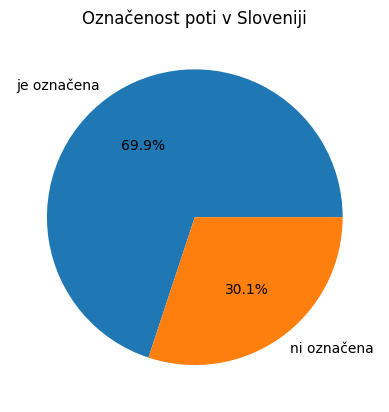

In [11]:
gore_poti = pd.read_csv("gore_poti.csv")

slo_gore_z_potmi = pd.merge(slovenske_gore, gore_poti, left_on="id", right_on="id")
slo_gore_z_potmi["označenost"] = slo_gore_z_potmi["zahtevnost"].apply(lambda x: "ni označena" if  " neoznačena " in x else "je označena")

slo_gore_z_potmi.groupby("označenost").size().plot.pie(title="Označenost poti v Sloveniji", autopct='%1.1f%%')


Približno 70 % poti v Sloveniji je označenih. Za tako dobro označenost se je za zahvaliti Planinski zvezi Slovenije ter ostalim planinskim društvom.

Kaj pa po svetu? Ali je več označenih ali neoznačenih poti?

<Axes: title={'center': 'Označenost poti po svetu'}>

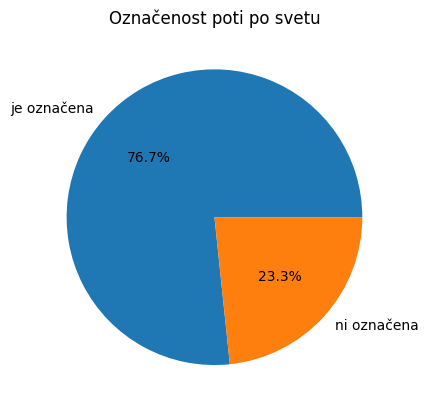

In [12]:
vse_gore_z_potmi = pd.merge(gore_razbito, gore_poti, left_on="id", right_on="id")
vse_gore_z_potmi["označenost"] = vse_gore_z_potmi["zahtevnost"].apply(lambda x: "ni označena" if " neoznačena " in x else "je označena")

vse_gore_z_potmi.groupby("označenost").size().plot.pie(title="Označenost poti po svetu", autopct='%1.1f%%')

Po svetu je torej še večji delež označenih poti, kot jih je v Sloveniji. Ta sklep je narejen na podlagi zbranih podatkov, ki pa verjetno niso povsem reprezentativni, saj so izbrane najbrž le bolj zanimive in znane označene poti iz tujine. 

Pojavi se nam pa še naslednje vprašanje: "Kako vsi ti podatki vplivajo na priljubljenost in število ogledov?"

### Priljubljenost

Ali je višina gore povezana s priljubljenostjo ter številom ogledov? Kaj pa zahtevnost, dolžina poti? Kaj pa okoliški razgled na druge gore? V tem razdelku bomo odgovorili na ta vprašanja. Priljubljenost se meri v odstotkih.

Oglejmo si najprej grafa priljubljenosti v odvisnoti od višine ter ogledov v odvisnosti od višine.

<Axes: title={'center': 'Število ogledov v odvisnosti od višine'}, xlabel='višina', ylabel='število ogledov'>

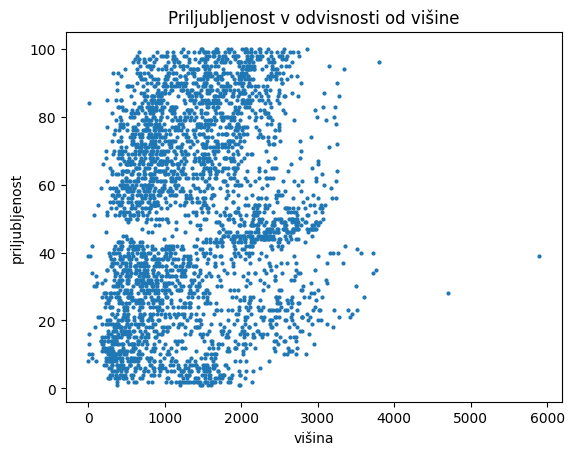

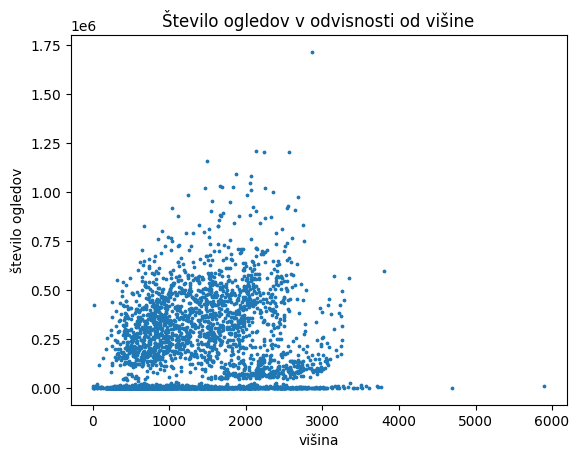

In [13]:
gore.plot.scatter(x = "višina", y="priljubljenost", title="Priljubljenost v odvisnosti od višine", s = 4)
gore.plot.scatter(x= "višina", y="število ogledov", s = 3, title="Število ogledov v odvisnosti od višine")

Očitno ni nobene odvisnosti. Poskusimo še z dolžino poti. Morda so gore, ki imajo daljše poti manj priljubljene.

<Axes: title={'center': 'Priljubljenost vrha v odvisnosti od dolžine poti'}, xlabel='dolžina poti v urah', ylabel='priljubljenost'>

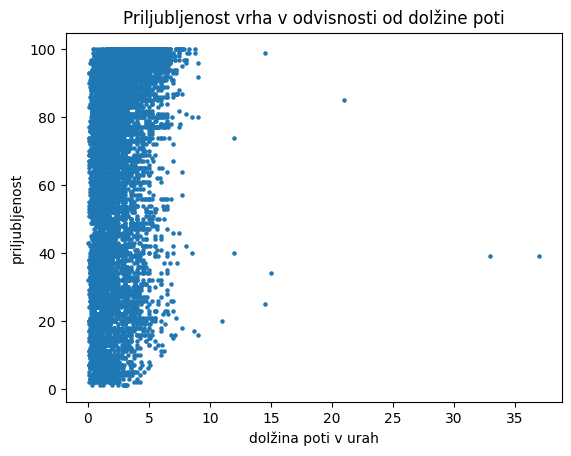

In [14]:
gore_z_potmi = pd.merge(gore, gore_poti, left_on="id", right_on="id")

def cas_v_ure(cas):
    if "h" in cas:
        ure_minute = cas.split(" ")
        ure = int(ure_minute[0])
        minute = int(ure_minute[2]) if len(ure_minute) > 2 else 0
    else:
        ure = 0
        minute = int(cas.split()[0])
    return ure + minute / 60

gore_z_potmi["dolžina poti v urah"] = gore_z_potmi["čas"].apply(cas_v_ure)
gore_z_potmi.plot.scatter(x = "dolžina poti v urah", y="priljubljenost", title="Priljubljenost vrha v odvisnosti od dolžine poti", s=5)

Tudi tukaj ni nobene očitne povezave. Poskusimo še z zahtevnostjo poti. Tukaj bomo obravnavali koeficient zahtevnosti, ki je izračunan prek zahtevnost poti pomnožene s časom. Lahke poti imajo zahtevnost 1, delno zahtevne imajo zahtevnost 3, zahtevne 5, zelo zahtevne 7 ter alpinistični vzponi 10.

<Axes: title={'center': 'Priljubljenost vrha v odvisnosti od zahtevnosti poti'}, xlabel='koeficient zahtevnosti', ylabel='priljubljenost'>

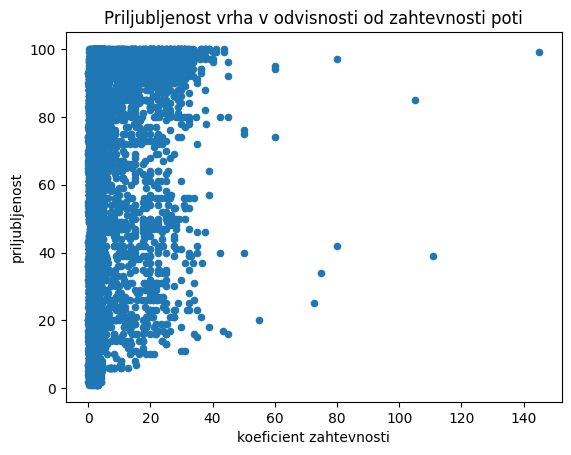

In [15]:
def razvrsti_zahtevnost(zahtevnost):
    if "lahka" in zahtevnost or "lahko" in zahtevnost:
        return 1
    elif "delno zahtevna" in zahtevnost or "delno zahtevno" in zahtevnost:
        return 3
    elif "zahtevna" in zahtevnost or "zahtevno" in zahtevnost:
        return 5
    elif "zelo zahtevna" in zahtevnost or "zelo zahtevno" in zahtevnost:
        return 7
    elif "alpinistični vzpon" in zahtevnost:
        return 10
    else:
        return None
 
gore_z_potmi["zahtevnost urejena"] = gore_z_potmi["zahtevnost"].apply(razvrsti_zahtevnost)
gore_z_potmi["koeficient zahtevnosti"] = gore_z_potmi.apply(lambda vrstica: (vrstica["dolžina poti v urah"] * vrstica["zahtevnost urejena"]), axis=1)

gore_z_potmi.plot.scatter(x = "koeficient zahtevnosti", y="priljubljenost", title="Priljubljenost vrha v odvisnosti od zahtevnosti poti")

Izgleda, da zahtevnost ne vpliva na priljubljenost gore. Zdi se že, da poti nimajo veliko povezave s priljubljenostjo vrha. Preden obupamo poskusimo še s številom poti.

<Axes: title={'center': 'Priljubljenost vrha v odvisnosti od števila poti'}, xlabel='število poti', ylabel='priljubljenost'>

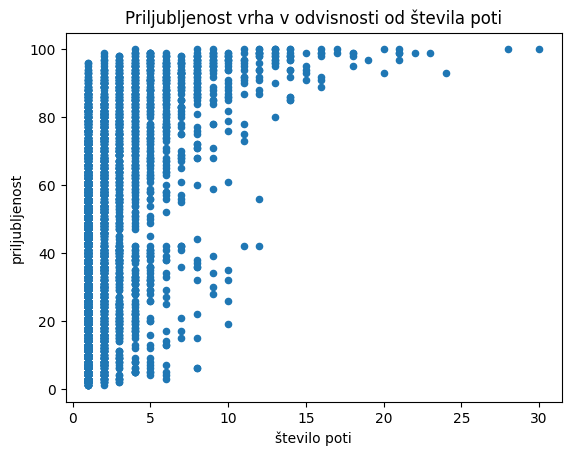

In [16]:
gore.plot.scatter(x = "število poti", y="priljubljenost", title="Priljubljenost vrha v odvisnosti od števila poti")

Očitno je število poti povezano s priljubljenostjo vrha, ampak le pri večjem številu poti. Mogoče je razlog za to vključevanje večjega števila poti do priljubljenih vrhov med podatke, ali pa da je zaradi priljubljenosti vrhov nastalo več poti.

Premaknimo se zdaj še na razgled iz vrha. Kako torej vpliva število okoliških vrhov v okolici 2 km na priljubljenost?

<Axes: title={'center': 'Priljubljenost vrha v odvisnosti od števila sosedov'}, xlabel='število sosedov v okolici 2 km', ylabel='priljubljenost'>

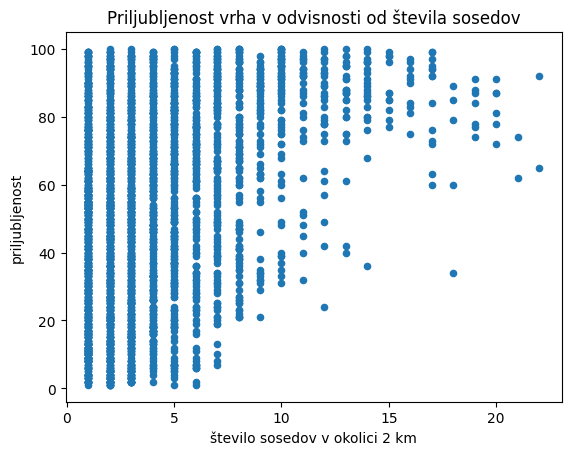

In [17]:
gore_okolica = pd.read_csv("gore_okolica.csv")
gore_sosedje = pd.merge(gore, gore_okolica, left_on="id", right_on="id")

gore["število sosedov v okolici 2 km"] = gore_sosedje.groupby("id").size()
gore.plot.scatter(x = "število sosedov v okolici 2 km", y="priljubljenost", title="Priljubljenost vrha v odvisnosti od števila sosedov")

Izgleda, da je za goro z večjim številom sosedov bolj verjetno, da je priljubljena. Predvidevam, da je gora bolj priljubljena zaradi lepšega razgleda z vrha na druge vrhove. Pri manjšem številu sosedov ni povezave s priljubljenostjo vrha.

Gotovo morata biti povezana priljubljenost in število ogledov. Oglejmo si torej graf priljubljenosti vrha v odvisnosti od števila ogledov.

<Axes: title={'center': 'Priljubljenost vrha v odvisnosti od števila ogledov'}, xlabel='število ogledov', ylabel='priljubljenost'>

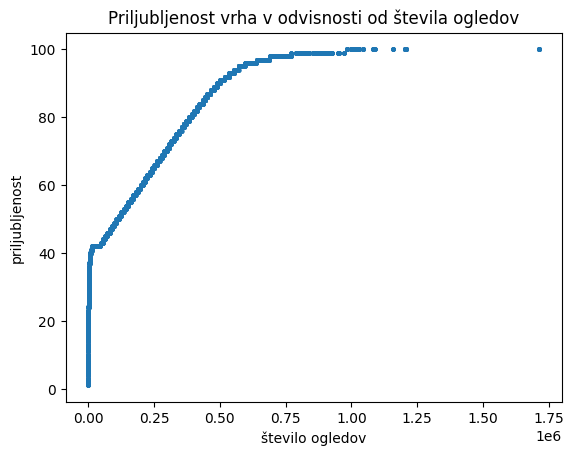

In [18]:
gore_z_potmi.plot.scatter(x = "število ogledov", y="priljubljenost", s=5, title="Priljubljenost vrha v odvisnosti od števila ogledov")

Graf spominja na logaritemsko funkcijo. Izgleda, da je bila priljubljenost izračunana prek logaritma števila ogledov.

### Predlogi

Dodajmo še nekaj konkretnih nasvetov. Denimo, da se nam po tej analizi pojavi želja iti v hribe. Ker pa kot matematiki vedno iščemo najlažjo pot do rešitve, si zadamo naslednji problem. Iščemo čim bolj slikovite, kratke in lahke izlete, ki pa imajo seveda označene poti, da se ne izgubimo. Prav tako se omejimo na Slovenijo, saj se ne bi radi predolgo vozili.


In [19]:
skupno_gore = pd.merge(gore, gore_z_potmi)

def oznacenost(pot):
    if " neoznačena " in pot:
        return "ni označena"
    elif "brezpotje" in pot:
        return "ni označena"
    else:
        return "je označena"

skupno_gore["označenost"] = skupno_gore["zahtevnost"].apply(oznacenost)
slikovit = ((skupno_gore["število slik"] >= 5) & (skupno_gore["število sosedov v okolici 2 km"] >= 5) & 
            (skupno_gore["označenost"] == "je označena") & skupno_gore["država"].str.contains("Slovenija"))

skupno_gore[slikovit].sort_values("koeficient zahtevnosti")[["ime", "višina", "začetna točka", "čas", "zahtevnost"]].head(5)


,ime,višina,začetna točka,čas,zahtevnost
7096,Mozirska koča na Golteh,1356,Golte,5 min,lahka označena pot
2704,Koča na Soriški planini,1306,Bohinjsko sedlo,5 min,lahka označena pot
222,Senčnica Josipine Turnograjske,570,Potoče,7 min,lahka označena pot
5333,Tominčev slap,750,Podljubelj,10 min,lahka označena pot
3812,Slap Peričnik - spodnji slap,800,Koča pri Peričniku,10 min,lahka označena pot


Lahko si torej izberemo enega izmed zgornjih izletov. Če pa hočemo malo zahtevnejše slikovite poti, ki so pa povrh zelo priljubljene, pa lahko izbiramo izmed:

In [20]:
slikovit_ravno_prav_zahteven = slikovit & (skupno_gore["koeficient zahtevnosti"] >= 2) & (skupno_gore["koeficient zahtevnosti"] <= 4)
skupno_gore[slikovit_ravno_prav_zahteven].sort_values("priljubljenost", ascending=False)[["ime", "višina", "začetna točka", "čas", "zahtevnost"]].head(5)

,ime,višina,začetna točka,čas,zahtevnost
6578,Storžič,2132,Povlje,4 h,lahka označena pot
2605,Stol,2236,Valvasorjev dom pod Stolom,3 h,lahka označena pot
3137,Gradišče (Velika planina),1666,Za Ušivcem,2 h,lahka označena pot
3136,Gradišče (Velika planina),1666,Kraljev hrib,3 h,lahka označena pot
3135,Gradišče (Velika planina),1666,Kranjski Rak,2 h 10 min,lahka označena pot


### Ugotovitve

Iz podatkov smo ugotovili:

- podatki so osredotočeni na Slovenijo,
- v Sloveniji imamo več vrhov pod 1000 m kot vrhov nad 1000 m,
- Julijske Alpe so daleč najvišje,
- največ vrhov v Sloveniji se nahaja v Julijskih Alpah,
- večina gorskih poti je označenih,
- zahtevnost in dolžina poti ne vplivata na priljubljenost gore,
- števili poti in okoliških vrhov sta delno povezani s priljubljenostjo vrha,
- višina gore ne vpliva na njeno priljubljenost.

Za konec si pa lahko na interaktivnem zemljevidu ogledamo, kje se v resnici nahajajo vse te gore, ki smo jih opazovali. Obarvane so po gorovjih. Ko miško držimo nad podatkom, se nam bodo izpisale informacije o imenu, državi, gorovju, višini, vrsti in geografski dolžini ter širini.

In [4]:
import plotly.express as px

fig = px.scatter_geo(
    gore, 
    lat='širina', 
    lon='dolžina', 
    hover_name="ime", 
    hover_data=["država", "višina", "vrsta", "gorovje"],
    color="gorovje"
)

fig.update_layout(
    margin={"r": 10,"l": 10, "b": 10, "t": 10},  
    geo={
        "landcolor": "lightgray", 
        "showcountries": True,
        "countrycolor": "white",  
        "projection_scale": 1.5, 
        "center": {"lat": 46.37832, "lon": 13.83648},  # Triglav
        "fitbounds": "locations",  
    },
    showlegend = False
)

fig.show()